<a href="https://colab.research.google.com/github/HARJAP-SINGH-3105/Is_the_road_safe-/blob/main/ResNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf


In [ ]:
from tensorflow import keras
import numpy as np 
import cv2
from PIL import Image
from matplotlib import pyplot as plt

In [ ]:

from keras.datasets import fashion_mnist

In [ ]:
(X_train,Y_train),(X_test,Y_test) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [ ]:
print(X_train[0].shape)

(28, 28)


In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
size = (32,32)

def resize_the_images(data):
  array  = np.zeros((data.shape[0],32,32))
  for i in range(0,data.shape[0]):
 
    array[i,:,:] =cv2.resize(data[i],size,interpolation =cv2.INTER_AREA)

 
  return array

In [ ]:
X_train=resize_the_images(X_train)

In [ ]:
X_train.shape

(60000, 32, 32)

In [ ]:
train_data =  X_train.reshape((X_train.shape[0],32,32,1))
train_arr= np.zeros((len(train_data),32,32,3))
for i, item in enumerate(train_data):
  train_arr[i,:,:,:]= cv2.cvtColor(item.astype(np.float32),cv2.COLOR_GRAY2RGB)

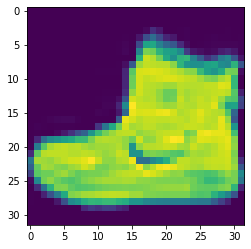

In [ ]:
plt.imshow(X_train[0])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


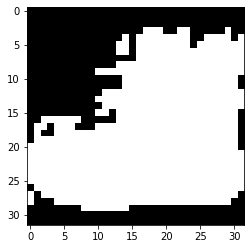

In [ ]:
plt.imshow(train_arr[0])

In [ ]:
train_arr.shape

(60000, 32, 32, 3)

In [ ]:
train_arr=train_arr/255.0

In [ ]:
from keras.models import Sequential
from keras.layers import Flatten,Dense,GlobalAveragePooling2D

In [ ]:
#Built Model with Transfer Learning (ResNet50)
resnet_model =Sequential()
base_model = tf.keras.applications.ResNet50(
    include_top = False,
    input_shape = (32,32,3),
    weights='imagenet',
    input_tensor= None,
    pooling ='avg',
    classes =10
)

for layer in base_model.layers:
  layer.trainable = False


94781440/94765736 [==============================] - 1s 0us/step


In [ ]:
resnet_model.add(base_model)
resnet_model.add(Flatten())
resnet_model.add(Dense(128,activation='relu'))
resnet_model.add(Dense(10,activation='softmax'))
# resnet_model.summary(_)

In [ ]:
from tensorflow.keras.optimizers import Adam

In [ ]:
resnet_model.compile(optimizer= Adam(learning_rate =0.001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
resnet_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 128)               262272    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 23,851,274
Trainable params: 263,562
Non-trainable params: 23,587,712
_________________________________________________________________


In [21]:
resnet_model.fit(train_arr,Y_train,epochs=20,validation_split=0.1)

Epoch 1/20
1688/1688 [==============================] - 232s 135ms/step - loss: 0.9309 - accuracy: 0.6531 - val_loss: 0.7230 - val_accuracy: 0.7285
Epoch 2/20
1688/1688 [==============================] - 221s 131ms/step - loss: 0.7204 - accuracy: 0.7281 - val_loss: 0.7385 - val_accuracy: 0.7263
Epoch 3/20
1688/1688 [==============================] - 225s 133ms/step - loss: 0.6671 - accuracy: 0.7500 - val_loss: 0.6489 - val_accuracy: 0.7480
Epoch 4/20
1688/1688 [==============================] - 223s 132ms/step - loss: 0.6498 - accuracy: 0.7540 - val_loss: 0.6040 - val_accuracy: 0.7808
Epoch 5/20
1688/1688 [==============================] - 222s 132ms/step - loss: 0.6290 - accuracy: 0.7632 - val_loss: 0.6231 - val_accuracy: 0.7733
Epoch 6/20
1688/1688 [==============================] - 229s 136ms/step - loss: 0.6187 - accuracy: 0.7666 - val_loss: 0.6302 - val_accuracy: 0.7688
Epoch 7/20
1688/1688 [==============================] - 243s 144ms/step - loss: 0.6053 - accuracy: 0.7729 - val_

KeyboardInterrupt: ignored